# IMPORTS

In [2]:
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__
!pip install pyyaml h5py 

In [3]:
import os
import numpy as np 
import tensorflow as tf

import datetime, os
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,  Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import datasets, layers, models

from tensorflow.keras import regularizers, optimizers

from IPython.display import display
from tensorflow.keras.preprocessing.image import array_to_img 
#Tensorboard
from tensorflow.keras.callbacks import TensorBoard
from time import strftime


import matplotlib.pyplot as plt
%matplotlib inline


# Constants

In [4]:
LOG_DIR = 'tensorboard_cifar_logs\\'


label_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog',
               'Horse', 'Ship', 'Truck']

# Get the Data

In [5]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

# Explore the Data

In [6]:
x_train_all.shape

(50000, 32, 32, 3)

In [7]:
nr_images, x, y, c = x_train_all.shape
print(f"images = {nr_images} | width(genişlik) = {x}p | height(yükseklik) = {y}p | channels(rgb) = {c}  ")

images = 50000 | width(genişlik) = 32p | height(yükseklik) = 32p | channels(rgb) = 3  


In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_train_all.shape

(50000, 1)

In [10]:
y_test.shape

(10000, 1)

# IPython Display

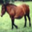

In [11]:
pic = array_to_img(x_train_all[7])
display(pic)

In [12]:
y_train_all[7][0]

7

In [13]:
label_names[y_train_all[7][0]]

'Horse'

# Matplotlib Display

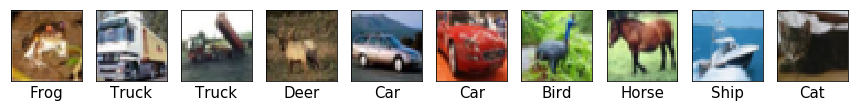

In [14]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1) #rows , columns , i=0(i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(label_names[y_train_all[i][0]], fontsize=15)
    plt.imshow(x_train_all[i])

# Preprocess Data

In [15]:
#uint8 : positive number
print(type(x_train_all[0][0][0][0]))

#RGB değerleri 0 ve 1 arasında olur.
x_train_all, x_test = x_train_all / 255.0 , x_test /255.0 
print(type(x_train_all[0][0][0][0]))

<class 'numpy.uint8'>
<class 'numpy.float64'>


### Create Validation Dataset

In [16]:
x_val = x_train_all[:10000] #Validation size
y_val = y_train_all[:10000]
y_val.shape

(10000, 1)

In [17]:
x_train = x_train_all[10000:]
y_train = y_train_all[10000:]
print(f"{x_train.shape} train data | {x_val.shape} validation data | {x_test.shape} test data")

(40000, 32, 32, 3) train data | (10000, 32, 32, 3) validation data | (10000, 32, 32, 3) test data


### Create a small dataset

In [18]:
x_train_xs = x_train[:1000] #SMALL TRAIN SIZE
y_train_xs = y_train[:1000]

# Define the NN using Keras

In [19]:
def create_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  # compile model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

#units: number of neurons in the layer
#input_dim: width*height*c

# model_1 = Sequential([
#     Dense(units=128, input_dim=total_inputs, activation="relu", 
#           name="m1_hidden1"),
#     Dense(units=64, activation="relu", name="m1_hidden2"),
#     Dense(units=16, activation="relu", name="m1_hidden3"),
#     Dense(units=10, activation="softmax", name="output")
# ])

# #Compile model
# model_1.compile(optimizer='adam', 
#                 loss='sparse_categorical_crossentropy', 
#                 metrics=['accuracy']) 

In [20]:
model_2 = Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']) 


In [21]:
#Cross Entropy Loss
#provides a probability value between 0 and 1 as an output

#Gradient Descent
#move down to lost function to minimize loss

#Optimiser
#an algorithm that calculates the loss and adjusts the weights

#ADAM Optimiser

#bias: shift the entire curve

In [22]:
model = create_model()

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

# Tensorboard (visualising learning)

In [24]:
def get_tensorboard1(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    print(folder_name)
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print("Successfully created directory")

    return TensorBoard(log_dir=dir_paths)

# #COLAB
# !pip install tensorboardcolab
# from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)





# Fit Model

In [25]:
#problem: overfitting
#solution:regularisation
#early stopping (keras callbacks earlystopping)
#Dropout 

In [26]:
samples_per_batch = 256

In [0]:
%%time
nr_epochs = 75
model.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch,
            epochs=nr_epochs, verbose=0, validation_data = (x_val, y_val), callbacks=[tensorboard_callback])

In [0]:
%%time
nr_epochs = 30
model.fit(x_train, y_train, batch_size=samples_per_batch,
            epochs=nr_epochs, verbose=1, validation_data = (x_val, y_val), callbacks=[tensorboard_callback])

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
39936/40000 [============================>.] - ETA: 0s - loss: 2.0767 - accuracy: 0.2144
Epoch 00001: saving model to training_1/cp.ckpt
40000/40000 [==============================] - 4s 103us/sample - loss: 2.0763 - accuracy: 0.2146 - val_loss: 1.6910 - val_accuracy: 0.3794
Epoch 2/30
39936/40000 [============================>.] - ETA: 0s - loss: 1.6766 - accuracy: 0.3768
Epoch 00002: saving model to training_1/cp.ckpt
40000/40000 [==============================] - 3s 78us/sample - loss: 1.6764 - accuracy: 0.3769 - val_loss: 1.4265 - val_accuracy: 0.4717
Epoch 3/30
39680/40000 [============================>.] - ETA: 0s - loss: 1.4695 - accuracy: 0.4616
Epoch 00003: saving model to training_1/cp.ckpt
40000/40000 [==============================] - 3s 78us/sample - loss: 1.4692 - accuracy: 0.4618 - val_loss: 1.2387 - val_accuracy: 0.5448
Epoch 4/30
39680/40000 [============================>.] - ETA: 0s - loss: 1.3331 - accuracy

In [70]:
#SAVE MODEL

#!mkdir -p saved_model
#model.save('saved_model/my_model') 
#!ls saved_model
#!ls saved_model/my_model


In [0]:
%%time
nr_epochs = 25
model_2.fit(x_train, y_train, batch_size=256,
            epochs=nr_epochs, verbose=0, validation_data = (x_val, y_val), callbacks=[tensorboard_callback])

# Load DATA

In [27]:
load_model = tf.keras.models.load_model('saved_model/my_model')

In [28]:
load_model = tf.keras.models.load_model('saved_model/my_model')
loss, acc = load_model.evaluate(x_val, y_val, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/1 - 5s - loss: 0.6189 - accuracy: 0.8190
Restored model, accuracy: 81.90%


In [29]:
#%load_ext tensorboard
#%tensorboard --logdir logs


# Predictions on Individual Images

In [30]:
test = np.expand_dims(x_val[0], axis=0)
test.shape
np.set_printoptions(precision=3)

In [31]:
load_model.predict(test)

array([[1.824e-05, 6.536e-06, 2.099e-02, 1.532e-01, 1.807e-03, 3.231e-02,
        7.915e-01, 1.628e-04, 6.991e-06, 1.352e-05]], dtype=float32)

In [32]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = load_model.predict_classes(test_img)[0]
    print(f"Actual value: {y_val[number][0]} vs. predicted: {predicted_val}")


Actual value: 6 vs. predicted: 6
Actual value: 9 vs. predicted: 9
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 4
Actual value: 1 vs. predicted: 1
Actual value: 1 vs. predicted: 1
Actual value: 2 vs. predicted: 2
Actual value: 7 vs. predicted: 7
Actual value: 8 vs. predicted: 8
Actual value: 3 vs. predicted: 3


In [33]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = load_model.predict_classes(test_img)[0]
    print(f"Actual value: {label_names[y_val[number][0]]} vs. predicted: {label_names[predicted_val]}")


Actual value: Frog vs. predicted: Frog
Actual value: Truck vs. predicted: Truck
Actual value: Truck vs. predicted: Truck
Actual value: Deer vs. predicted: Deer
Actual value: Car vs. predicted: Car
Actual value: Car vs. predicted: Car
Actual value: Bird vs. predicted: Bird
Actual value: Horse vs. predicted: Horse
Actual value: Ship vs. predicted: Ship
Actual value: Cat vs. predicted: Cat


# Evaluation

In [34]:
load_model.metrics_names

['loss', 'accuracy']

In [35]:
test_loss, test_acc = load_model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss : {test_loss:0.3}, Test Accuracy: {test_acc:0.2%}")

Test loss : 0.557, Test Accuracy: 81.41%


### Confusion Matrix

In [36]:
!pip install numpy scipy sklearn
from sklearn.metrics import confusion_matrix

In [37]:
predictions = load_model.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions )

In [38]:
#itertools
import itertools

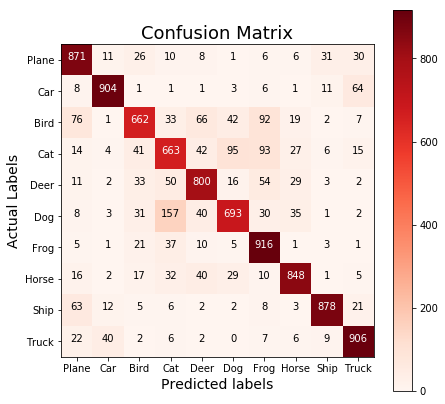

In [39]:
plt.figure(figsize=(7,7))
plt.imshow(conf_matrix, cmap=plt.cm.Reds)
plt.title("Confusion Matrix", fontsize=18)
plt.ylabel("Actual Labels", fontsize=14)
plt.xlabel("Predicted labels", fontsize=14)
plt.yticks(np.arange(10), label_names)
plt.xticks(np.arange(10), label_names)

plt.colorbar()
for i, j in itertools.product(range(10), range(10)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment='center', color="white" if conf_matrix[i,j]> 350 else 'black')

plt.show()

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Doğruluk (accuracy)  :{:.2f}".format(accuracy_score(y_test, predictions)))
print("Keskinlik (precision) :{:.2f}".format(precision_score(y_test, predictions, average='weighted')))
print("Duyarlılık (recall) :{:.2f}".format(recall_score(y_test, predictions, average='weighted')))
print("f_1 skoru (f1) :{:.2f}".format(f1_score(y_test, predictions, average='weighted')))

Doğruluk (accuracy)  :0.81
Keskinlik (precision) :0.82
Duyarlılık (recall) :0.81
f_1 skoru (f1) :0.81


In [41]:
from PIL import Image

def im_read(name):
    image = Image.open(name)
    plt.imshow(image)
    plt.show()
    image = Image.fromarray(np.uint8(image))
    image = image.resize((32, 32))

    resize_frame = np.asarray(image)
    print(resize_frame.shape)
    plt.imshow(resize_frame)
    plt.show()
    return resize_frame

In [42]:
def convertCIFAR10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    print(c.shape)
    c[0] = img
    print(c[0].shape)
    return c



# First Predict

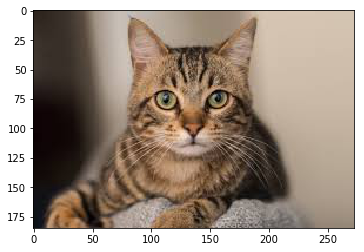

(32, 32, 3)


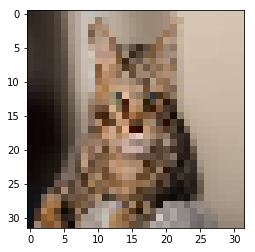

(1, 32, 32, 3)
(32, 32, 3)


In [43]:
image1 = im_read("cat.jpg")
data1 = convertCIFAR10Data(image1)

In [44]:
p1 = load_model.predict_classes(data1) 

In [45]:
print(f"Resim {label_names[p1[0]]}, olarak tahmin edildi.")

Resim Cat, olarak tahmin edildi.


# Second Predict

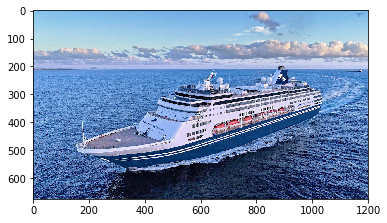

(32, 32, 3)


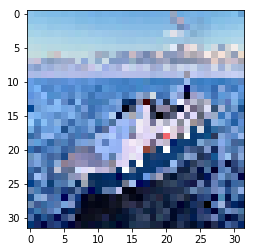

(1, 32, 32, 3)
(32, 32, 3)
Resim Ship, olarak tahmin edildi.


In [46]:
image2 = im_read("ship.jpg")
data2 = convertCIFAR10Data(image2)
p2 = load_model.predict_classes(data2)
print(f"Resim {label_names[p2[0]]}, olarak tahmin edildi.")